In [ ]:
import pandas as pd
from google.colab import files

# Upload the file manually
uploaded = files.upload()

# Get the uploaded file name dynamically
file_name = list(uploaded.keys())[0]  # Extract filename

# Load the dataset
df = pd.read_csv(file_name)

print("✅ Dataset uploaded and loaded successfully!")


Saving water_potability (1).csv to water_potability (1).csv
✅ Dataset uploaded and loaded successfully!


In [ ]:
# Check for missing values
df.isnull().sum()


,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display first 5 rows of scaled data
df_scaled.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0


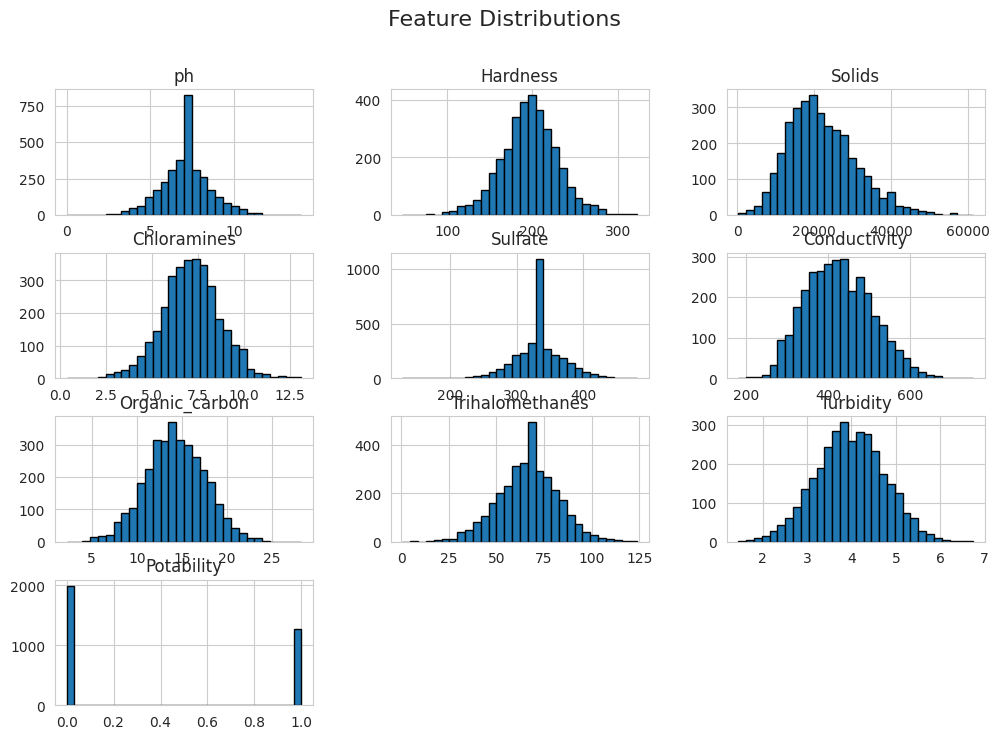

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Plot histogram of all features
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

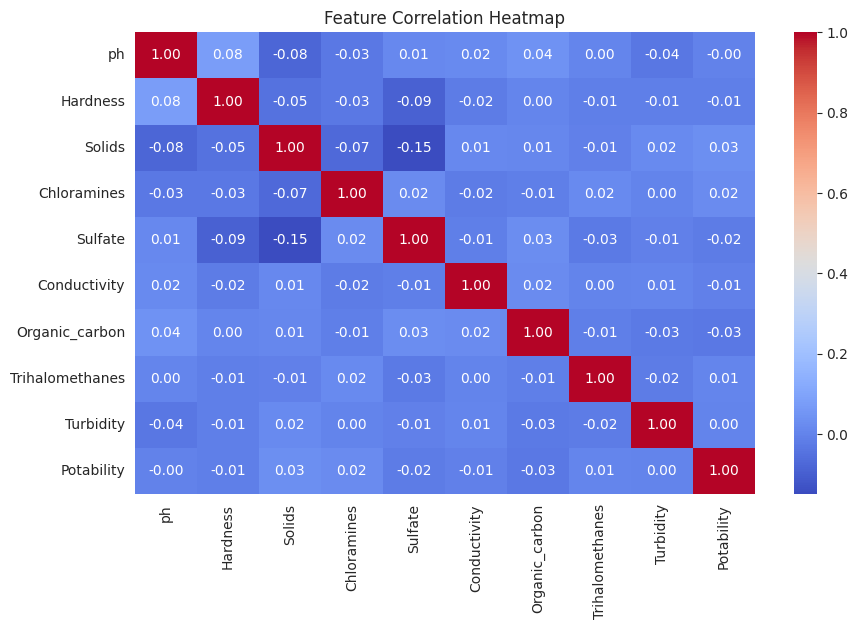

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

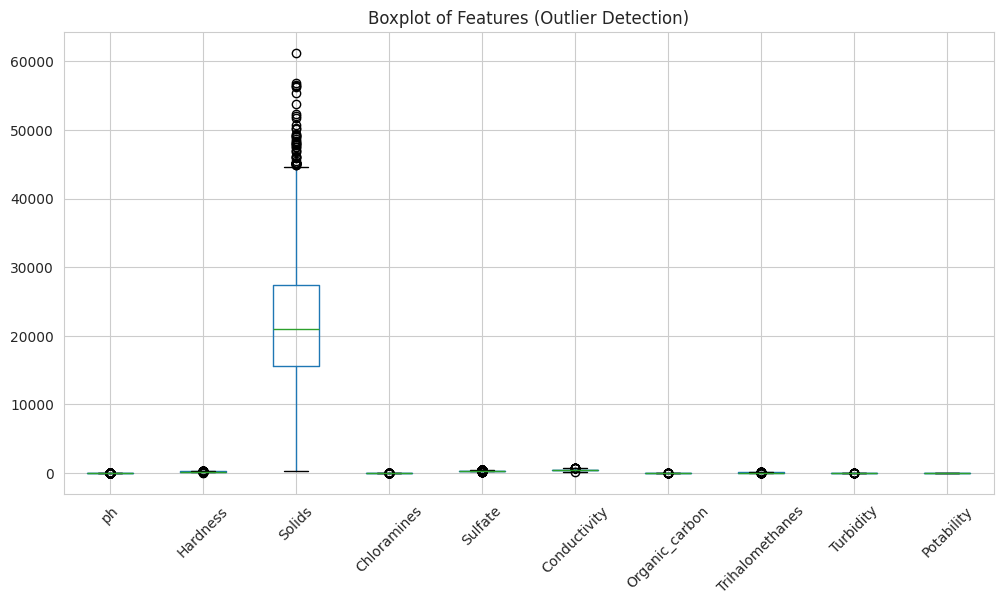

In [ ]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot of Features (Outlier Detection)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_scaled.drop(columns=["Potability"])  # Remove target column
y = df_scaled["Potability"]  # Target variable

# Split into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2620, 9), (656, 9), (2620,), (656,))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Define models with fixed random states for consistency
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
                           alpha=0.001, batch_size=64, max_iter=1500, random_state=42)

# Train models
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

print("✅ All individual models trained successfully!")


✅ All individual models trained successfully!


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Define Stacking Classifier
stack_model = StackingClassifier(estimators=[
    ('Naive Bayes', nb_model),
    ('Decision Tree', dt_model),
    ('MLP', mlp_model)
], final_estimator=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))

# Train Stacking Model
stack_model.fit(X_train, y_train)

print("✅ Stacking Model Trained Successfully!")


✅ Stacking Model Trained Successfully!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naïve Bayes": nb_model,
    "Decision Tree": dt_model,
    "MLP": mlp_model,
    "Stacking Classifier": stack_model
}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"📊 {name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


📊 Naïve Bayes Model Performance:
Accuracy: 0.614329268292683
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.89      0.74       400
         1.0       0.52      0.19      0.28       256

    accuracy                           0.61       656
   macro avg       0.57      0.54      0.51       656
weighted avg       0.59      0.61      0.56       656

--------------------------------------------------
📊 Decision Tree Model Performance:
Accuracy: 0.6341463414634146
Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.87      0.74       400
         1.0       0.57      0.26      0.36       256

    accuracy                           0.63       656
   macro avg       0.61      0.57      0.55       656
weighted avg       0.62      0.63      0.59       656

--------------------------------------------------
📊 MLP Model Performance:
Accuracy: 0.6509146341463414
Classification Re

<ipython-input-21-9c638f8d1e19>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


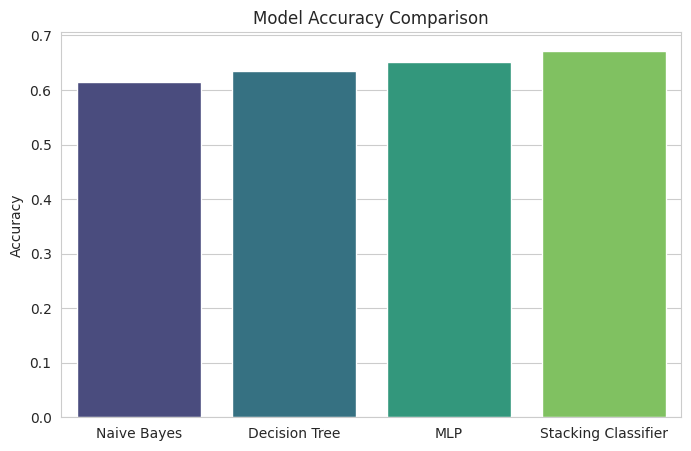

In [ ]:
# Store model accuracies
model_accuracies = {
    "Naive Bayes": accuracy_score(y_test, nb_model.predict(X_test)),
    "Decision Tree": accuracy_score(y_test, dt_model.predict(X_test)),
    "MLP": accuracy_score(y_test, mlp_model.predict(X_test)),
    "Stacking Classifier": accuracy_score(y_test, stack_model.predict(X_test))
}

# Bar plot of model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


  0%|          | 0/100 [00:00<?, ?it/s]

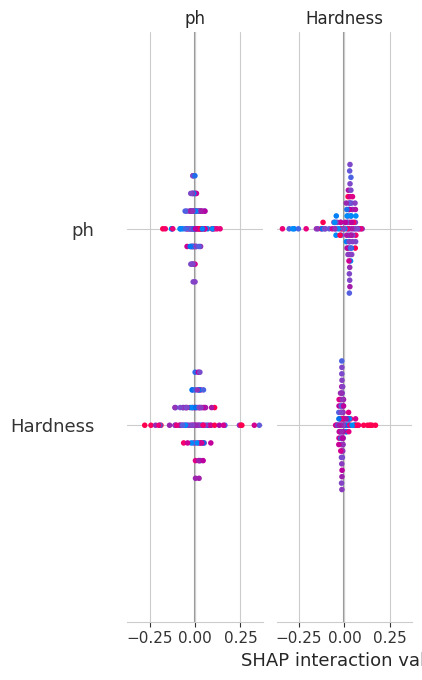

✅ SHAP Analysis Completed!


In [ ]:
import shap
import numpy as np

# SHAP expects a callable model, so we define a wrapper function
def model_predict(data):
    return stack_model.predict_proba(data)

# Use KernelExplainer for general models like StackingClassifier
explainer = shap.KernelExplainer(model_predict, X_train[:100])  # Use a subset for efficiency
shap_values = explainer.shap_values(X_test[:100])  # Compute SHAP values on test data subset

# Plot SHAP summary
shap.summary_plot(shap_values, X_test[:100], feature_names=df.columns[:-1])

print("✅ SHAP Analysis Completed!")


In [ ]:
# Get probabilities for Class 1 (Safe Water)
y_probs_full = stack_model.predict_proba(X)[:, 1]

# Show first 10 probability scores
for i, prob in enumerate(y_probs_full[:10]):
    print(f"Sample {i+1}: Probability of Safe Water = {prob:.4f}")


Sample 1: Probability of Safe Water = 0.4565
Sample 2: Probability of Safe Water = 0.3094
Sample 3: Probability of Safe Water = 0.4211
Sample 4: Probability of Safe Water = 0.3118
Sample 5: Probability of Safe Water = 0.3142
Sample 6: Probability of Safe Water = 0.1928
Sample 7: Probability of Safe Water = 0.1048
Sample 8: Probability of Safe Water = 0.2276
Sample 9: Probability of Safe Water = 0.6252
Sample 10: Probability of Safe Water = 0.1399


In [ ]:
# Lower threshold to 0.40 to classify more samples as Safe Water (1)
new_threshold = 0.40
df_scaled["Predicted Potability"] = (y_probs_full > new_threshold).astype(int)

# Show only the 'Predicted Potability' column
df_scaled[["Predicted Potability"]].head(10)


,Predicted Potability
0,1
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [ ]:
import joblib

# Save the trained model
joblib.dump(stack_model, "water_quality_model.pkl")

# Download the file to your PC
from google.colab import files
files.download("water_quality_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>